In [90]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam 

from keras.models import load_model
from sklearn.model_selection import train_test_split

In [91]:
csv_filename = "qc aggregated data.csv"
df = pd.read_csv(csv_filename)
df

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,quezon city,2020-01-01,29.3,24.5,26.9,32.3,24.5,28.7,22.6,77.4,...,7.0,3,NaN,2020-01-01T06:20:49,2020-01-01T17:37:11,0.19,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"98429099999,RPLC,98327099999,98428099999,RPLL,..."
1,quezon city,2020-01-02,31.0,24.7,27.6,35.4,24.7,29.2,21.9,72.1,...,8.1,4,NaN,2020-01-02T06:21:11,2020-01-02T17:37:45,0.22,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"98429099999,RPLC,98327099999,98428099999,RPLL,..."
2,quezon city,2020-01-03,31.9,22.8,27.1,34.2,22.8,28.0,19.7,65.0,...,7.7,4,NaN,2020-01-03T06:21:33,2020-01-03T17:38:20,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"98429099999,RPLC,98327099999,98428099999,RPLL,..."
3,quezon city,2020-01-04,31.2,21.6,26.8,34.4,21.6,27.9,20.3,68.7,...,8.3,4,NaN,2020-01-04T06:21:54,2020-01-04T17:38:55,0.29,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"98429099999,RPLC,98327099999,98428099999,RPLL,..."
4,quezon city,2020-01-05,30.9,23.3,27.1,33.0,23.3,28.2,21.1,71.0,...,8.9,4,NaN,2020-01-05T06:22:14,2020-01-05T17:39:30,0.32,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"98429099999,RPLC,98327099999,98428099999,RPLL,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,quezon city,2023-07-27,30.8,25.7,27.8,38.8,25.7,32.4,25.4,86.5,...,5.5,3,30.0,2023-07-27T05:37:39,2023-07-27T18:27:01,0.31,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"98429099999,C6CX3,98327099999,98428099999,RPLL..."
1304,quezon city,2023-07-28,29.9,24.2,26.9,37.3,24.2,29.6,24.9,89.5,...,7.3,4,60.0,2023-07-28T05:37:54,2023-07-28T18:26:44,0.35,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"98429099999,C6CX3,98327099999,98428099999,RPLL..."
1305,quezon city,2023-07-29,29.4,21.9,25.7,36.3,21.9,26.9,25.0,94.9,...,7.2,5,30.0,2023-07-29T05:38:09,2023-07-29T18:26:25,0.38,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"98429099999,98327099999,98428099999,RPLL,98430..."
1306,quezon city,2023-07-30,28.0,24.9,26.6,34.5,24.9,29.0,25.1,92.0,...,7.9,5,30.0,2023-07-30T05:38:24,2023-07-30T18:26:06,0.41,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"98429099999,C6CX3,98327099999,98428099999,RPLL..."


In [92]:
df.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [93]:
df[["precip", "precipprob", "precipcover", "conditions", "description"]]

,precip,precipprob,precipcover,conditions,description
0,0.098,100,25.00,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...
1,0.049,100,12.50,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.
2,0.000,0,0.00,Partially cloudy,Partly cloudy throughout the day.
3,0.005,100,4.17,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...
4,0.397,100,12.50,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...
...,...,...,...,...,...
1303,37.916,100,29.17,"Rain, Overcast",Cloudy skies throughout the day with a chance ...
1304,98.198,100,29.17,"Rain, Overcast",Cloudy skies throughout the day with a chance ...
1305,80.292,100,29.17,"Rain, Overcast",Cloudy skies throughout the day with a chance ...
1306,23.661,100,29.17,"Rain, Overcast",Cloudy skies throughout the day with a chance ...


Predict: Precip, Precipprob (0 or 100), Precipcover
Map Prediction to Conditions and Description

In [94]:
df["conditions"].unique(), df["precipprob"].unique(), df["description"].unique()

(array(['Rain, Partially cloudy', 'Partially cloudy', 'Rain, Overcast',
        'Overcast'], dtype=object),
 array([100,   0], dtype=int64),
 array(['Partly cloudy throughout the day with a chance of rain throughout the day.',
        'Partly cloudy throughout the day with rain.',
        'Partly cloudy throughout the day.',
        'Partly cloudy throughout the day with late afternoon rain.',
        'Partly cloudy throughout the day with rain clearing later.',
        'Becoming cloudy in the afternoon with late afternoon rain.',
        'Partly cloudy throughout the day with afternoon rain.',
        'Becoming cloudy in the afternoon with early morning rain.',
        'Partly cloudy throughout the day with early morning rain.',
        'Partly cloudy throughout the day with morning rain.',
        'Partly cloudy throughout the day with rain in the morning and afternoon.',
        'Becoming cloudy in the afternoon.',
        'Becoming cloudy in the afternoon with rain.',
        'Clou

<Axes: >

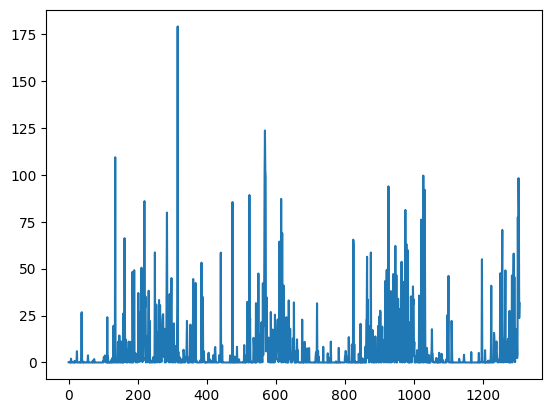

In [95]:
df["precip"].plot()

# Predicting Precipitation Probability

Predicting Precipitation Probability as a Time Series using LSTM, and Comparing said LSTM Prediction to ANN

In [96]:
raw_Inputs = df["precip"].copy()
window_length = 5
t_arr = raw_Inputs.to_numpy()
X = []
y= []

for i in range(len(t_arr)-window_length):
    t_row = []
    for j in t_arr[i:i+window_length]:
        t_row.append([j])
    X.append(t_row)
    y.append(t_arr[i + window_length])

X = np.array(X)
y = np.array(y)

X.shape, y.shape

((1303, 5, 1), (1303,))

In [97]:
# Train Test Split Implementation





In [98]:
# Set Num Implementation
train_part = 800
valid_part = 1000

X_train, y_train = X[:train_part], y[:train_part]
X_val, y_val = X[train_part:valid_part], y[train_part:valid_part]
X_test, y_test = X[valid_part:], y[valid_part:]

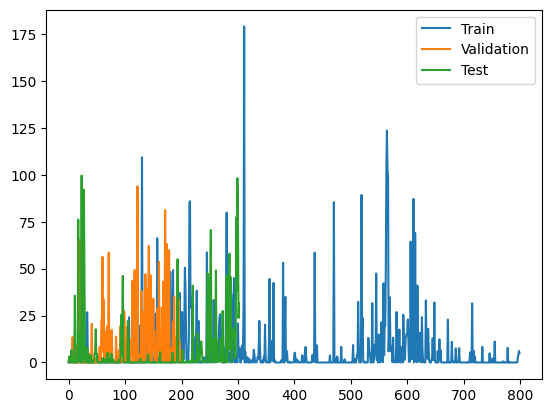

In [99]:
plt.plot(y_train, label="Train")
plt.plot(y_val, label="Validation")
plt.plot(y_test, label="Test")
plt.legend()
plt.show()

In [100]:
model = Sequential([
    layers.InputLayer((window_length, 1)),
    layers.SimpleRNN(64, return_sequences=True),
    layers.SimpleRNN(64),
    layers.Dense(4),
    layers.Dense(1)
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 5, 64)             4224      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 4)                 260       
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 12,745
Trainable params: 12,745
Non-trainable params: 0
_________________________________________________________________


In [101]:
cp = ModelCheckpoint("LSTMTestModel/", save_best_only=True)
model.compile(
    loss = MeanSquaredError(),
    optimizer = Adam(learning_rate=0.0001),
    metrics = [RootMeanSquaredError()]
)

In [102]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs = 10,
    callbacks = [cp]
)

Epoch 1/10


24/25 [===========================>..] - ETA: 0s - loss: 276.2765 - root_mean_squared_error: 16.6216

INFO:tensorflow:Assets written to: LSTMTestModel\assets


INFO:tensorflow:Assets written to: LSTMTestModel\assets


25/25 [==============================] - 7s 186ms/step - loss: 282.8980 - root_mean_squared_error: 16.8196 - val_loss: 382.7098 - val_root_mean_squared_error: 19.5630
Epoch 2/10
24/25 [===========================>..] - ETA: 0s - loss: 280.9283 - root_mean_squared_error: 16.7609

INFO:tensorflow:Assets written to: LSTMTestModel\assets


INFO:tensorflow:Assets written to: LSTMTestModel\assets


25/25 [==============================] - 4s 148ms/step - loss: 272.7238 - root_mean_squared_error: 16.5144 - val_loss: 366.2815 - val_root_mean_squared_error: 19.1385
Epoch 3/10
22/25 [=========================>....] - ETA: 0s - loss: 275.0432 - root_mean_squared_error: 16.5844

INFO:tensorflow:Assets written to: LSTMTestModel\assets


INFO:tensorflow:Assets written to: LSTMTestModel\assets


25/25 [==============================] - 4s 165ms/step - loss: 264.8877 - root_mean_squared_error: 16.2754 - val_loss: 353.8300 - val_root_mean_squared_error: 18.8104
Epoch 4/10
24/25 [===========================>..] - ETA: 0s - loss: 258.3673 - root_mean_squared_error: 16.0738

INFO:tensorflow:Assets written to: LSTMTestModel\assets


INFO:tensorflow:Assets written to: LSTMTestModel\assets


25/25 [==============================] - 4s 164ms/step - loss: 259.0362 - root_mean_squared_error: 16.0946 - val_loss: 342.5966 - val_root_mean_squared_error: 18.5094
Epoch 5/10
25/25 [==============================] - ETA: 0s - loss: 254.2821 - root_mean_squared_error: 15.9462

INFO:tensorflow:Assets written to: LSTMTestModel\assets


INFO:tensorflow:Assets written to: LSTMTestModel\assets


25/25 [==============================] - 4s 161ms/step - loss: 254.2821 - root_mean_squared_error: 15.9462 - val_loss: 333.6239 - val_root_mean_squared_error: 18.2654
Epoch 6/10
23/25 [==========================>...] - ETA: 0s - loss: 250.3713 - root_mean_squared_error: 15.8231

INFO:tensorflow:Assets written to: LSTMTestModel\assets


INFO:tensorflow:Assets written to: LSTMTestModel\assets


25/25 [==============================] - 4s 171ms/step - loss: 250.1181 - root_mean_squared_error: 15.8151 - val_loss: 327.5740 - val_root_mean_squared_error: 18.0990
Epoch 7/10
21/25 [========================>.....] - ETA: 0s - loss: 248.3302 - root_mean_squared_error: 15.7585

INFO:tensorflow:Assets written to: LSTMTestModel\assets


INFO:tensorflow:Assets written to: LSTMTestModel\assets


25/25 [==============================] - 4s 155ms/step - loss: 247.2206 - root_mean_squared_error: 15.7233 - val_loss: 321.7689 - val_root_mean_squared_error: 17.9379
Epoch 8/10
24/25 [===========================>..] - ETA: 0s - loss: 240.9061 - root_mean_squared_error: 15.5212

INFO:tensorflow:Assets written to: LSTMTestModel\assets


INFO:tensorflow:Assets written to: LSTMTestModel\assets


25/25 [==============================] - 4s 151ms/step - loss: 244.8408 - root_mean_squared_error: 15.6474 - val_loss: 317.5099 - val_root_mean_squared_error: 17.8188
Epoch 9/10
23/25 [==========================>...] - ETA: 0s - loss: 259.6639 - root_mean_squared_error: 16.1141

INFO:tensorflow:Assets written to: LSTMTestModel\assets


INFO:tensorflow:Assets written to: LSTMTestModel\assets


25/25 [==============================] - 4s 157ms/step - loss: 243.0524 - root_mean_squared_error: 15.5901 - val_loss: 313.8999 - val_root_mean_squared_error: 17.7172
Epoch 10/10
24/25 [===========================>..] - ETA: 0s - loss: 249.6250 - root_mean_squared_error: 15.7995

INFO:tensorflow:Assets written to: LSTMTestModel\assets


INFO:tensorflow:Assets written to: LSTMTestModel\assets


25/25 [==============================] - 4s 177ms/step - loss: 241.5388 - root_mean_squared_error: 15.5415 - val_loss: 311.0673 - val_root_mean_squared_error: 17.6371


In [103]:
model = load_model("LSTMTestModel/")

In [104]:
history.history["val_loss"]

[382.7098083496094,
 366.281494140625,
 353.8299560546875,
 342.5966491699219,
 333.6238708496094,
 327.57403564453125,
 321.76885986328125,
 317.5098571777344,
 313.8998718261719,
 311.0672912597656]

10/10 [==============================] - 0s 3ms/step


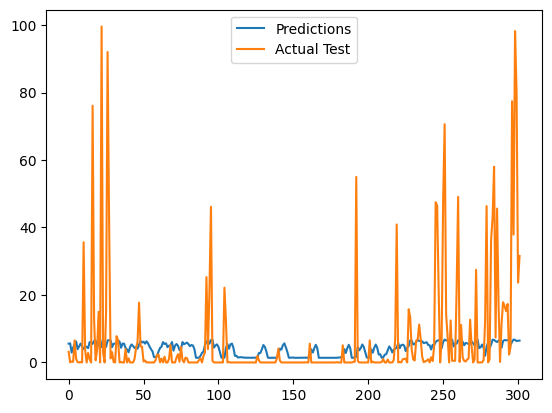

In [105]:
test_predictions = model.predict(X_test).flatten()
u = 1
l = 500
plt.plot(test_predictions[u:l], label="Predictions")
plt.plot(y_test[u:l], label="Actual Test")
plt.legend()
plt.show()


In [106]:
y_test

array([2.0000e-01, 3.1690e+00, 4.1000e-02, 2.8400e-01, 1.9700e-01,
       6.5530e+00, 1.0760e+00, 1.0100e-01, 2.6000e-02, 1.2800e-01,
       1.5000e-02, 3.5632e+01, 3.8320e+00, 0.0000e+00, 2.8260e+00,
       1.0100e+00, 0.0000e+00, 7.6096e+01, 1.2542e+01, 6.3800e-01,
       3.7100e+00, 1.5010e+01, 2.4000e-02, 9.9567e+01, 2.9200e+00,
       0.0000e+00, 1.4965e+01, 9.2008e+01, 4.2517e+01, 1.2000e+00,
       3.0750e+00, 1.0800e-01, 1.5000e-02, 7.7990e+00, 6.5190e+00,
       1.9000e-02, 1.2200e-01, 7.0000e-03, 0.0000e+00, 3.9650e+00,
       5.0000e-03, 1.2330e+00, 2.0000e-03, 2.0000e-03, 1.2000e-02,
       1.0590e+00, 4.2900e+00, 6.0730e+00, 1.7725e+01, 4.7560e+00,
       4.6870e+00, 2.9300e-01, 5.8800e-01, 0.0000e+00, 4.9000e-02,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.2200e-01,
       2.2800e+00, 2.3670e+00, 2.3000e-02, 1.1360e+00, 2.0000e-03,
       1.7340e+00, 0.0000e+00, 0.0000e+00, 1.0150e+00, 5.1610e+00,
       0.0000e+00, 2.0000e-02, 0.0000e+00, 1.4200e+00, 2.4470e

In [107]:
Epochs
Learning Rates
Window Length
Model Parameters (Number of LSTM layers, Number of Dense Outputs)
SimpleRNN, LSTM

SyntaxError: invalid syntax (1365425150.py, line 2)